In [1]:
from model import *
from data import *

In [11]:
labels = ['background','stage 1','stage 2','stage 3','border']

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
1999/2000 [============================>.] - ETA: 0s - loss: 0.2525 - accuracy: 0.9101
Epoch 00001: loss improved from inf to 0.25248, saving model to unet_membrane.hdf5
2000/2000 [==============================] - 395s 198ms/step - loss: 0.2525 - accuracy: 0.9101
Epoch 2/5
1999/2000 [============================>.] - ETA: 0s - loss: 0.1956 - accuracy: 0.9394
Epoch 00002: loss improved from 0.25248 to 0.19563, saving model to unet_membrane.hdf5
2000/2000 [==============================] - 392s 196ms/step - loss: 0.1956 - accuracy: 0.9394
Epoch 3/5
1999/2000 [============================>.] - ETA: 0s - loss: 0.1675 - accuracy: 0.9516
Epoch 00003: loss improved from 0.19563 to 0.16749, saving model to unet_membrane.hdf5
2000/2000 [==============================] - 392s 196ms/step - loss: 0.1675 - accuracy: 0.9516
Epoch 4/5
1999/2000 [============================>.] - ETA: 0s - loss: 0.1464 - accurac

### Train with npy file

In [3]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [6]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

30/30 [==============================] - 1s 29ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

In [7]:
import matplotlib.pyplot as plt

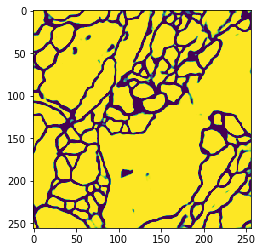

In [10]:
plt.imshow(results[0,:,:,0])